# Cross validation para predicción anual

El modelo que proponemos para predecir la performance del año entrante es:
1. Tomar vuelos del año anterior agrupados por meses.
2. Contar los vuelos retrasados
3. $OTP_{mes} = \{\frac{\text{cant. vuelos}_{mes}}{\text{\cant. vuelos con delay}_{mes}} : mes \in \{\text{e.}, \text{f.}, ..., \text{d.}\}\}$

> El módulo `predict` debe estar compilado
>
> Los datos vienen de `get_cant_vuelos.sh` y `get_delays_month.sh`

In [8]:
import numpy as np
import pandas as pd

df = pd.read_csv('../smaller_data/OTP_por_mes.csv')

df_group = df.groupby(['YEAR'])

data_array = []

for symbol, group in df_group:
    year = []
    for index, row in group.iterrows():
        year.append(row.value)
    data_array.append(year)
    
otp_mes = np.matrix(data_array)
N = otp_mes.shape[0]

print(otp_mes.shape)

(15, 12)


In [12]:
import predict

def predecirAno(F, i):
    assert i >= 1
    assert i < N

    cml = predict.CML(F, len(F(1)))

    x = np.arange(1, 13)
    y = np.asarray(otp_mes[i-1]).reshape(-1)
    cml.fit(x, y)

    x_barra = [j + 12 for j in x]
    y_barra = []
    for j in x_barra:
        y_barra.append(cml.predict(j))

    return {
        "train": (x, y), # train
        "expected": (x_barra, np.asarray(otp_mes[i]).reshape(-1)), # expected
        "actual": (x_barra, y_barra) # actual
    }

In [13]:
import math
import matplotlib.pyplot as plt


def crossValidation(F):
    
    predicciones = [predecirAno(F, i+1) for i in range(0,N-1)]
    rmses = []

    for i in range(0, 14):
        fig, ax = plt.subplots()
        x_train = [predicciones[i]["train"][0][j] + i*12 for j in range(12)]
        y_train = predicciones[i]["train"][1]
        x_actual = [predicciones[i]["actual"][0][j] + i*12 for j in range(12)]
        y_actual = predicciones[i]["actual"][1]
        x_expected = [predicciones[i]["expected"][0][j] + i*12 for j in range(12)]
        y_expected = predicciones[i]["expected"][1]
        ax.scatter(x_train, y_train)
        ax.plot(x_actual, y_actual)
        ax.scatter(x_expected, y_expected)
        plt.show()
        
        rmse = 0
        for j in range(12):
            rmse += math.pow(y_expected[j] - y_actual[j], 2)
        rmse = rmse/N
        rmse = math.sqrt(rmse)
        
        print(rmse)
        rmses.append(rmse)

    print(sum(rmses))

    #ax.legend()
    #plt.xticks(range(1,  16*12+1, 12), [1994+i for i in x_axis])


## Experimentación

Vamos a probar con distintas familias $F$

TL;DR; ir al final donde se expone la función con menos error.

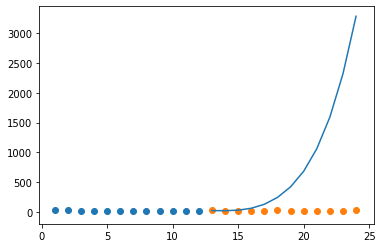

1158.9015749540058


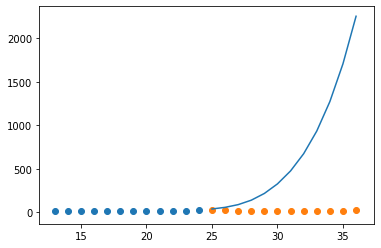

855.4906873924352


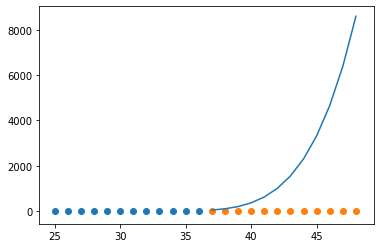

3221.5539684366713


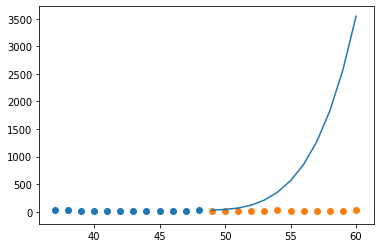

1290.7710536102866


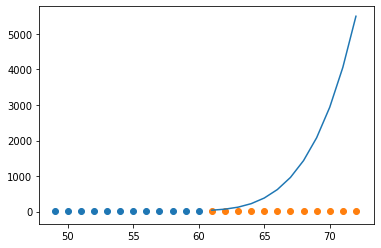

2042.4352715958287


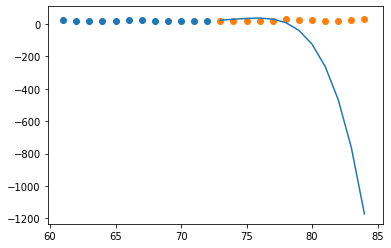

400.72006513379324


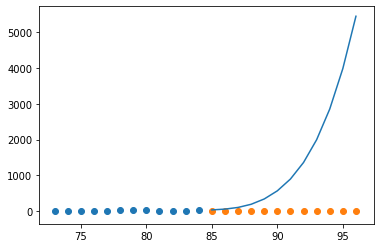

2002.8861203288257


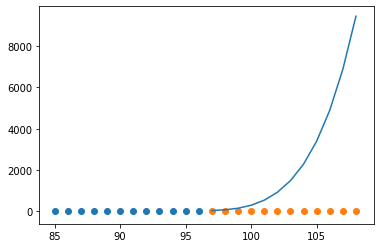

3462.0990111422425


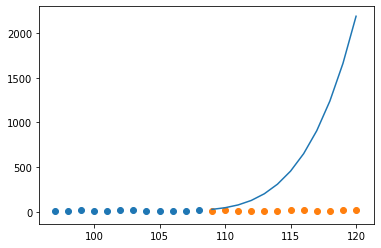

833.801514676973


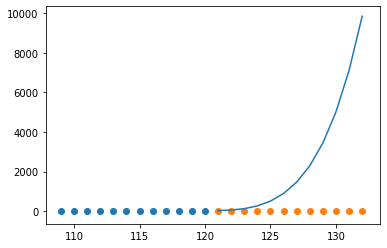

3578.703684825574


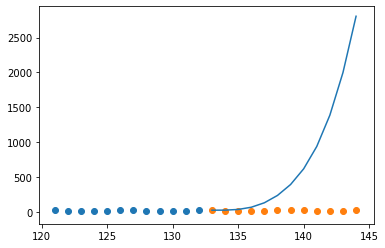

997.6550003117911


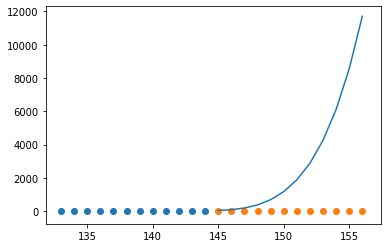

4304.673116204829


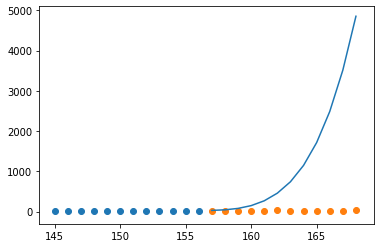

1761.0207995865956


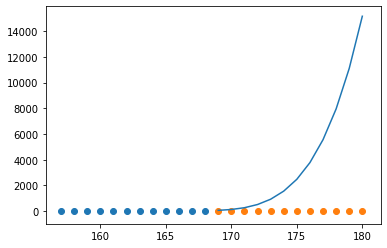

5590.002298809503
31500.714167009355


In [15]:
def F(x):
    return np.array([1, x, math.pow(x, 2), math.pow(x, 3), math.pow(x, 4), math.pow(x, 5), math.cos(x)])

crossValidation(F)

La función que habiamos elegido parece ser malisima...

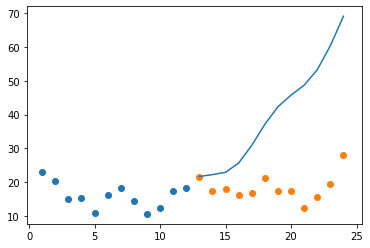

23.303269922990847


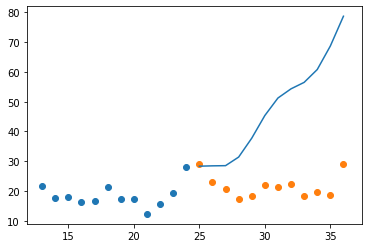

27.373107549961176


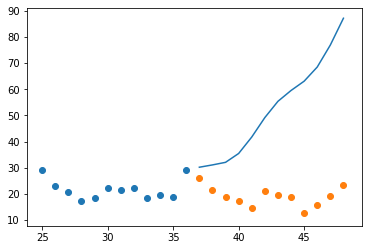

34.484172973230855


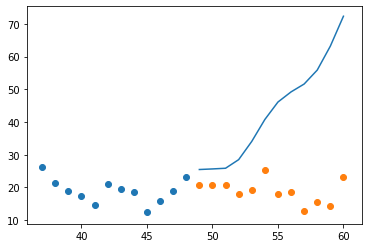

26.19158271016881


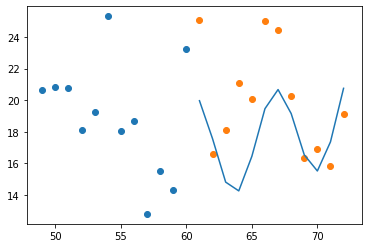

3.169412277678745


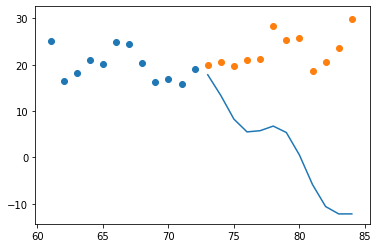

21.270544090998477


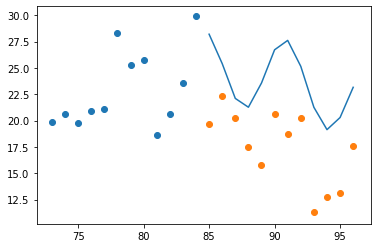

5.895889655395388


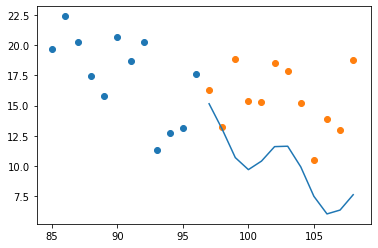

5.655248063494437


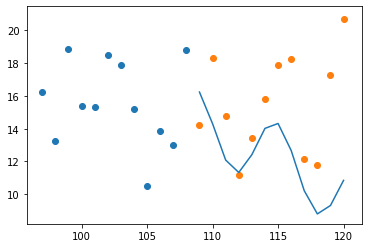

4.082002710413382


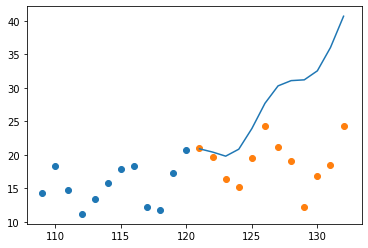

9.94848408697957


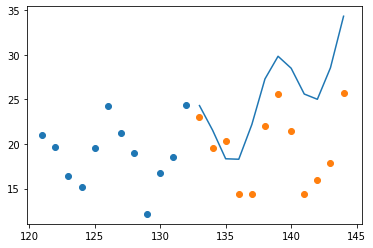

6.201613169481821


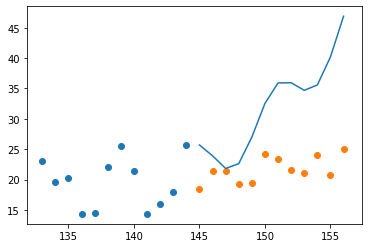

10.770767014849765


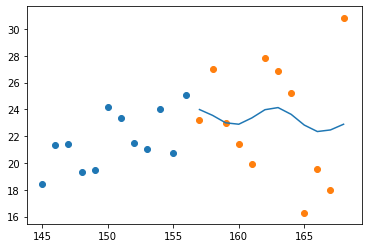

3.5150184255235493


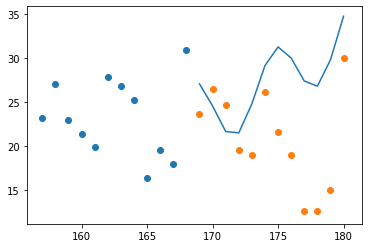

7.970640242142663
189.83175289330947


In [16]:
def F(x):
    return np.array([1, x, math.pow(x, 2), math.cos(x)])

crossValidation(F)

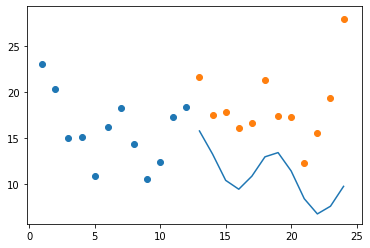

7.60487587526656


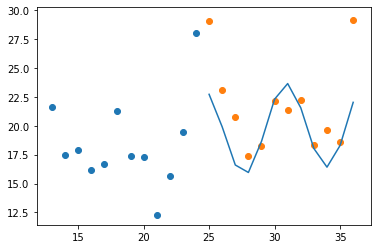

3.031116194389039


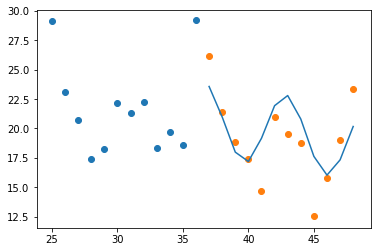

2.3362008349152044


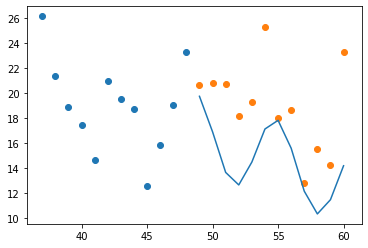

4.557864837977453


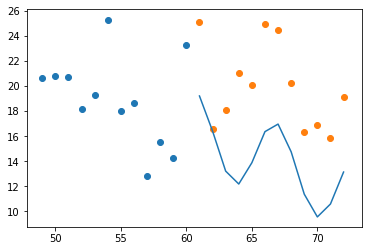

5.643581072541971


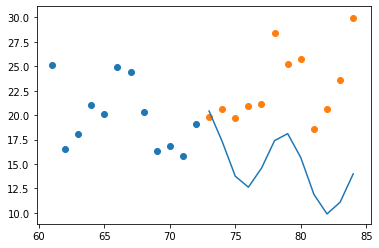

8.174164208515704


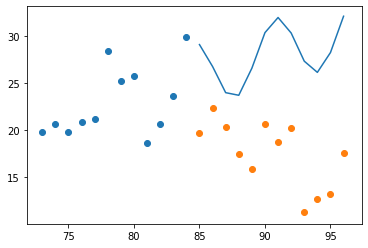

10.06445223843305


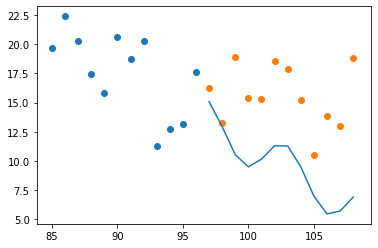

5.986243916380177


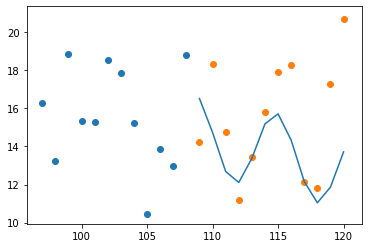

2.865221793573415


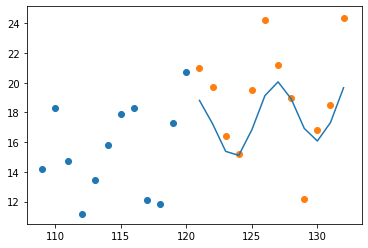

2.4849219160969387


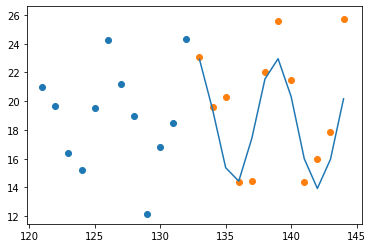

2.3541260223477964


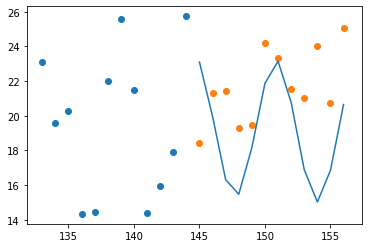

3.700232006461571


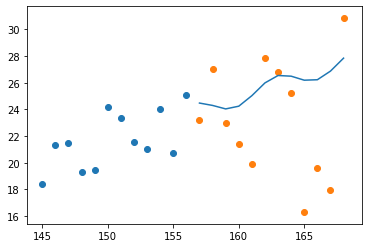

4.317269075831796


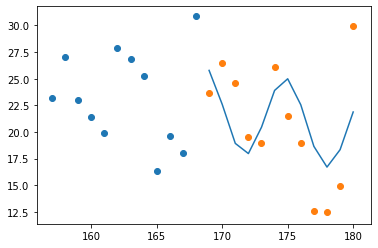

3.8134786755090064
66.93374866823967


In [17]:
def F(x):
    return np.array([1, x, math.cos(x)])

crossValidation(F)

Va menjorandooo...

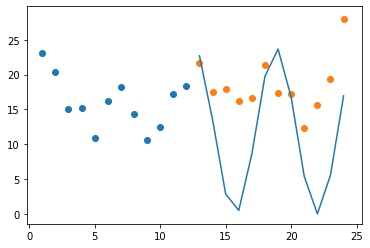

8.94699077234302


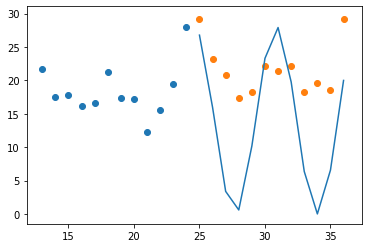

10.055598155035085


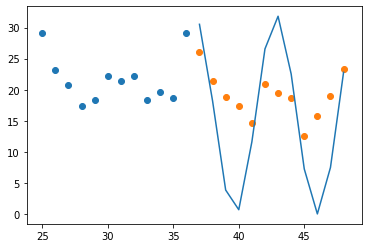

8.778281397788428


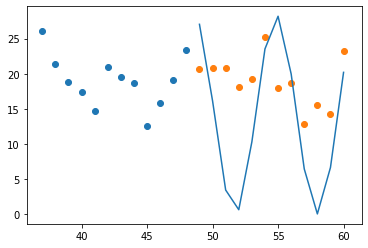

8.984695520202134


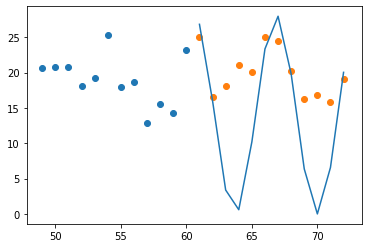

9.031525171288386


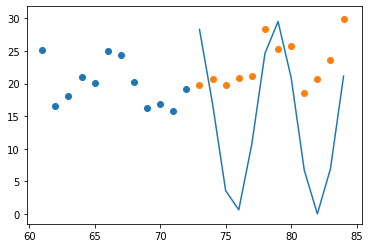

11.091564650331048


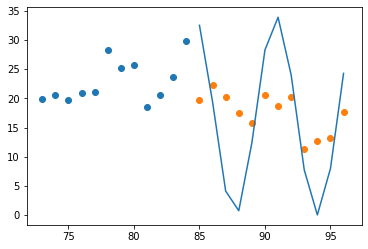

9.241672721468559


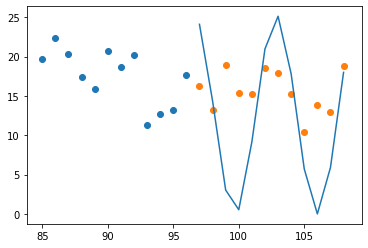

7.754234194467646


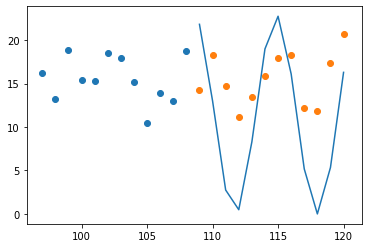

7.116881432056461


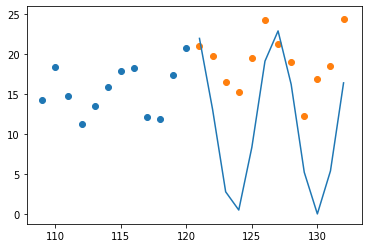

8.86185285234105


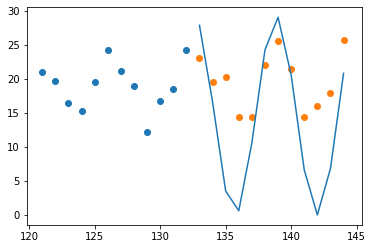

8.149479486300626


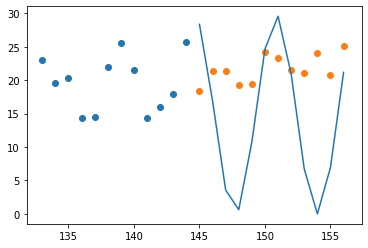

11.220432828701155


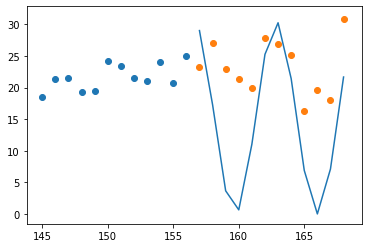

10.699472368021699


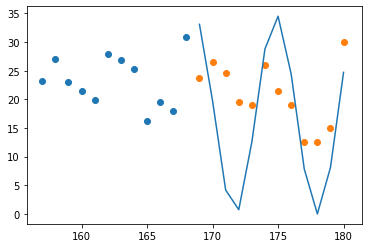

9.68453727281426
129.61721882315953


In [18]:
def F(x):
    return np.array([1 + math.cos(x)])

crossValidation(F)

Ahora no... vamos a iterar sobre la anterior (`[1, x, math.cos(x)]`)

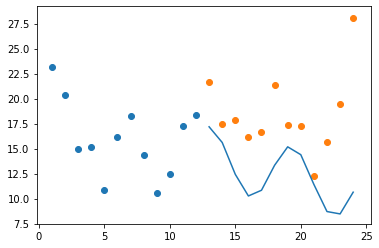

6.68188925049854


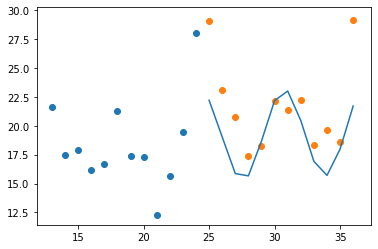

3.3733517188765396


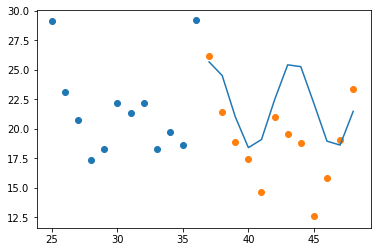

3.813293537760045


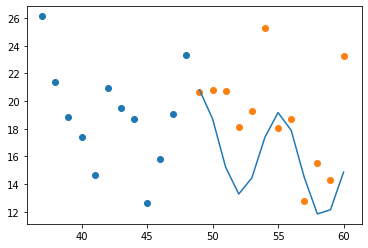

3.9779248333865684


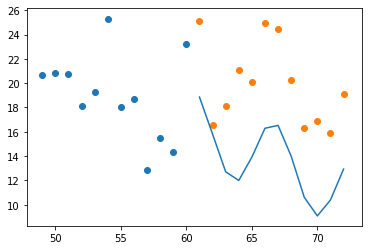

5.945596458348401


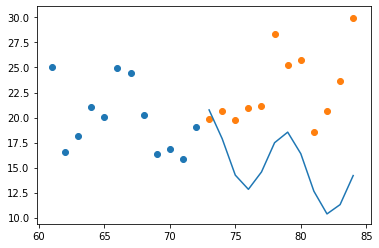

7.9068714651055805


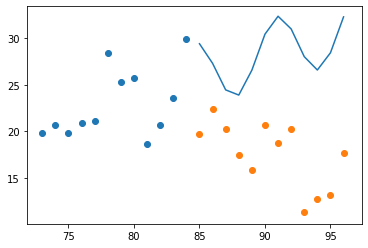

10.356738321010564


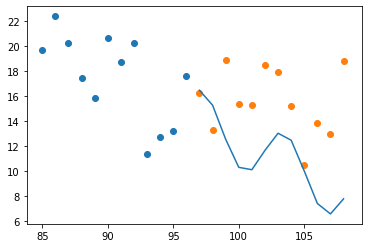

5.042021919657013


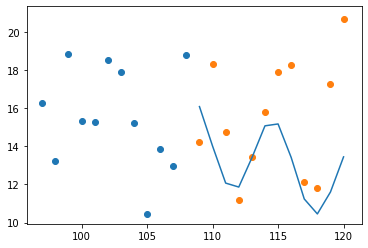

3.1513504353583786


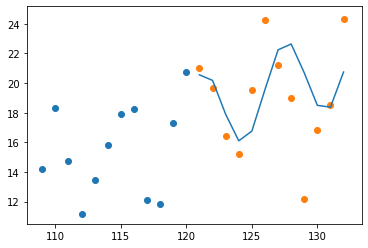

3.004242656527855


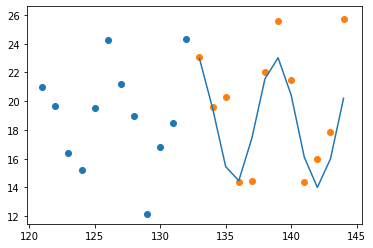

2.3284533565526617


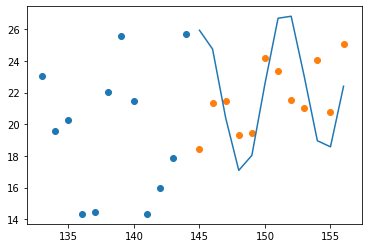

3.261781778150134


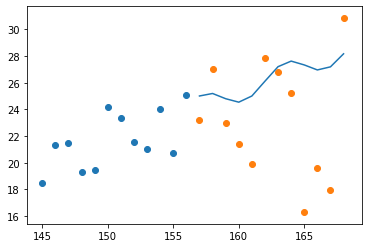

4.64047683924388


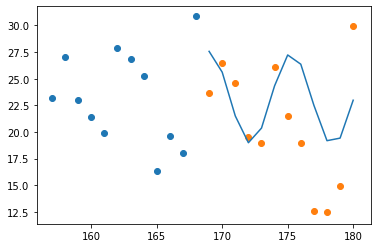

4.698360499500231
68.1823530699764


In [19]:
def F(x):
    return np.array([1, x, math.cos(x), math.sin(x)])

crossValidation(F)

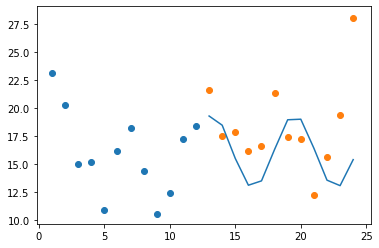

4.334376178453171


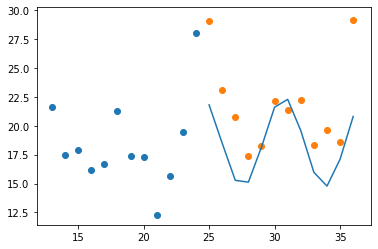

3.82453743873084


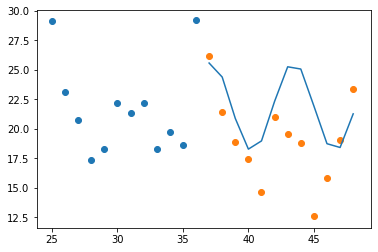

3.7089740673062948


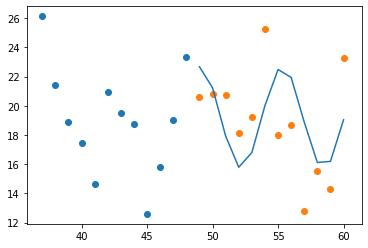

3.0642425321839206


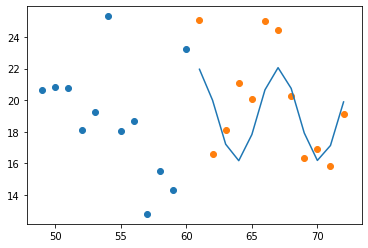

2.32951936826733


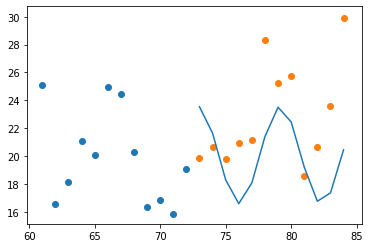

4.092421913950906


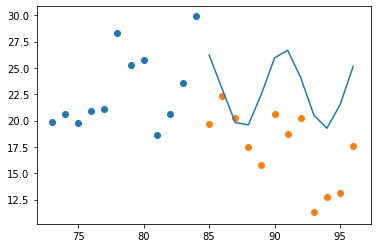

5.494930494666182


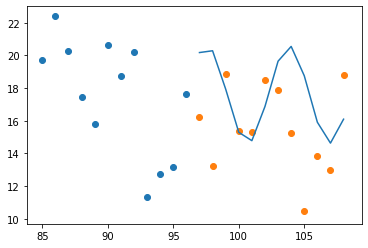

3.4887583344256567


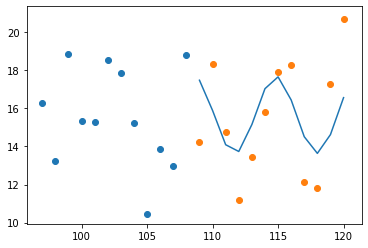

2.0776924210251644


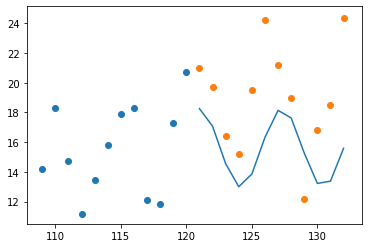

4.113422193157874


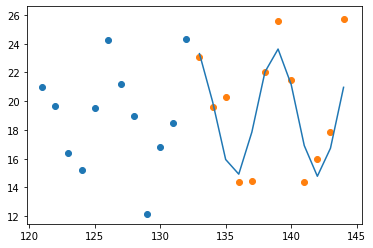

2.1136182935254837


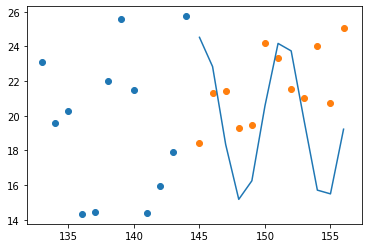

3.8975136286760956


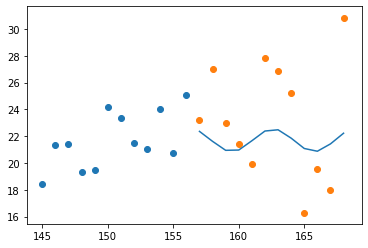

3.7269537971246582


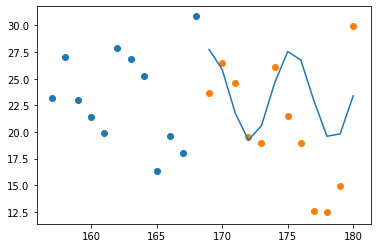

4.84921646776618
51.11617712925975


In [20]:
def F(x):
    return np.array([1, math.cos(x), math.sin(x)])

crossValidation(F)

Eso! esta parece predecir muy bien.

La media de error de prediccion basandose en este modelo es de $3,40774514195065$

Ahora si el grafico prolijito :D

In [46]:
import math
import matplotlib.pyplot as plt

rmses = []

def crossValidationTotal(F):
    
    predicciones = [predecirAno(F, i+1) for i in range(0,N-1)]
    rmses = []

    fig, ax = plt.subplots()

    for i in range(0, 14):
        x_train = [predicciones[i]["train"][0][j] + i*12 for j in range(12)]
        y_train = predicciones[i]["train"][1]
        x_actual = [predicciones[i]["actual"][0][j] + i*12 for j in range(12)]
        y_actual = predicciones[i]["actual"][1]
        y_expected = predicciones[i]["expected"][1]
        ax.scatter(x_train, y_train)
        ax.plot(x_actual, y_actual)
        
        rmse = 0
        for j in range(12):
            rmse += math.pow(y_expected[j] - y_actual[j], 2)
        rmse = rmse/N
        rmse = math.sqrt(rmse)
        
        print(rmse)
        rmses.append(rmse)
        
    media_rmses = sum(rmses) / 12
    
    plt.title('Cross validation - sliding window')
    plt.xlabel('Year')
    plt.ylabel('OTP')

    fig.set_figheight(10)
    fig.set_figwidth(15)

    plt.xticks(range(1,  17*12+1, 12), [1994+i for i in range(16)])
    
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
    ax.text(0.05, 0.05, 'Media MRSE: {0}'.format(media_rmses), transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

    plt.show()
    
print(sum(rmses))

0


4.334376178453171
3.82453743873084
3.7089740673062948
3.0642425321839206
2.32951936826733
4.092421913950906
5.494930494666182
3.4887583344256567
2.0776924210251644
4.113422193157874
2.1136182935254837
3.8975136286760956
3.7269537971246582
4.84921646776618


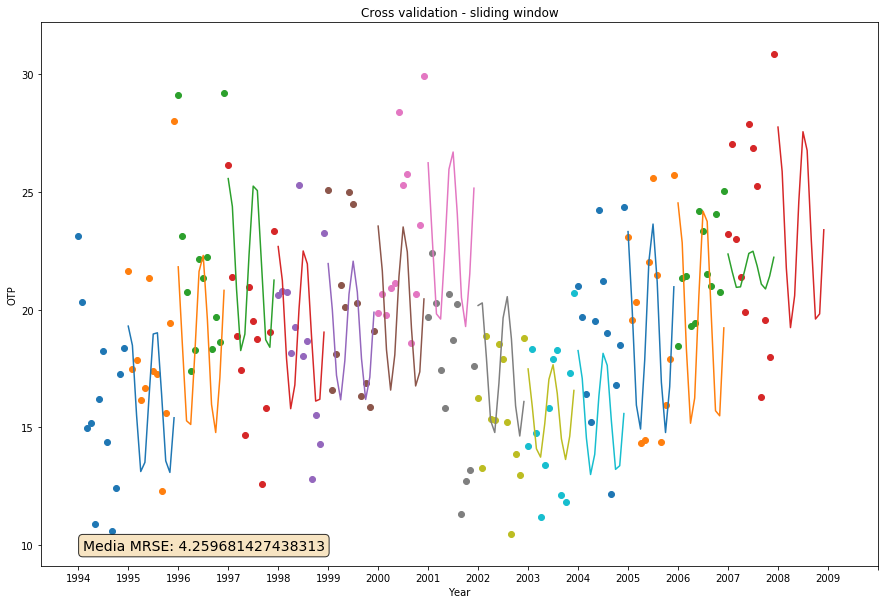

In [47]:
def F(x):
    return np.array([1, math.cos(x), math.sin(x)])

crossValidationTotal(F)